## Historical Stock Market Data (Assignment)

Dataset: https://www.kaggle.com/datasets/camnugent/sandp500

### Task:
#### Data Pre-Procesing:
    o Data Cleaning and Preparation
    o Use your preferred data analysis tool to import your dataset, for instance, Python and Pandas, etc.
    o Handling missing values: Identify and handle missing values appropriately (for instance, imputation, removal).
    o Data type conversion: Ensure data types are appropriate (for instance, dates converted to datetime format).
    o Outlier detection and handling: Identify and handle outliers if any (for instance, capping, flooring, or removal).

#### Exploratory Data Analysis (EDA):
• Univariate analysis:

    o Analyze numerical variables using descriptive statistics (mean, median, mode, standard deviation, etc.).
    o Plot the histogram and box plot of the stock prices, returns, and volatility.
    
• Bivariate analysis:

    o Plot the relationship between stock prices and market indices through scatter plots and correlation matrices.
    o Plot the relationship between stock returns and volatility through scatter plots and correlation matrices.
    
• Time Series Analysis:

    o Plot the time series of stock prices and returns on line charts.
    o Calculate and plot moving averages and exponential moving averages.
    o Extract and discuss trends, seasonality, and cyclical effects in the data.

### Knowing the data

Importing necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Loading the dataset
df_raw = pd.read_csv("Data Resource/all_stocks_5yr.csv")

First look on the data:

In [3]:
df_raw.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df_raw.shape

(619040, 7)

In [5]:
df_raw.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
df_raw.duplicated().sum()

0

In [8]:
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = ((df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
open,11,0.001777
high,8,0.001292
low,8,0.001292
date,0,0.000000
close,0,0.000000
volume,0,0.000000
Name,0,0.000000


In [9]:
df_raw[df_raw['open'].isna()]

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


In [10]:
df_raw[df_raw['high'].isna()]

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX
598236,2015-06-26,NaN,NaN,NaN,61.9000,100,WRK


In [11]:
df_raw['Name'].nunique()

505

After having a brief lookup on the data, the following can be derived about it:

- "date, open, high, low, close, volume, Name" are the features provided.
- There are no duplicate columns
- MISSING VALUES: There are considerably less missing values when compared to the size of the data. Mean impuitation over here may cause unstability in prediction models as those values might stand as outliers or pose highly unlikely values in certain regression models. Forward/backward filling can also be a good choice, but seeing the versatility of the data, and considerably less amount of missing values, we can simply remove null values. ARIMA or other time series imputation techniques can be applied as well.
- DATA TYPES: The date column is not in proper format, it can be converted to date-time format & features like day, month and year can also be engineered.
- OUTLIERS: Since stock prices are subject matter to market capital, investors' recurrence and company's performance, it can be assumed that the outliers in the prices are the resultant of the above factors. The outliers can be detected and if they're present, can be handled. Significant market events like earnings releases, mergers, acquisitions, or economic news that might cause unusual price movements. These events might explain extreme values and could be excluded from outlier analysis. After visually inspecting the values, the outliers can be either capped or windsorized.
- UNIQUE LABELS: There are 505 unique companies as per the unique ticker values that can be found in the dataset.

### Data Wrangling

In [12]:
#Dropping the null values:
df_raw = df_raw.drop(df_raw.loc[df_raw['open'].isnull()].index)

As observed previously, rows with missing open values are the rows with missing high and low values. So, only dropping the rows with missing open values will be enough for remobing missing values in all columns.

In [13]:
#Changing the date column to datetime format
df_raw['date'] = pd.to_datetime(df_raw['date'])

df_raw['Day'] = df_raw['date'].dt.day
df_raw['Month'] = df_raw['date'].dt.month
df_raw['Year'] = df_raw['date'].dt.year
df_raw['Day_of_week'] = df_raw['date'].dt.dayofweek
df_raw['Week_of_year'] = df_raw['date'].dt.isocalendar().week
df1 = df_raw.copy()

In [14]:
df1['returns'] = df1['close']-df1['open']
df1.sort_values(by = 'date')
df1.head()

,date,open,high,low,close,volume,Name,Day,Month,Year,Day_of_week,Week_of_year,returns
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,8,2,2013,4,6,-0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,11,2,2013,0,7,-0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,12,2,2013,1,7,-0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,13,2,2013,2,7,0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14,2,2013,3,7,-0.95


In [15]:
df1['daily_ret'] = df1.groupby('Name')['close'].pct_change()
df1.head()

,date,open,high,low,close,volume,Name,Day,Month,Year,Day_of_week,Week_of_year,returns,daily_ret
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,8,2,2013,4,6,-0.32,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,11,2,2013,0,7,-0.43,-0.019661
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,12,2,2013,1,7,-0.18,-0.013140
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,13,2,2013,2,7,0.36,0.027330
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14,2,2013,3,7,-0.95,-0.045703


In [16]:
df1['daily_ret'].fillna(0)

0         0.000000
1        -0.019661
2        -0.013140
3         0.027330
4        -0.045703
            ...   
619035    0.014206
619036   -0.013364
619037   -0.038421
619038   -0.007585
619039    0.008052
Name: daily_ret, Length: 619029, dtype: float64

In [17]:
#Calculating Equal-weighted index
eq_market_index = df1.groupby('date')['daily_ret'].mean()
eq_market_index = (1 + eq_market_index).cumprod()*100


In [18]:
eqmi_df = pd.DataFrame(eq_market_index)
eqmi_df = eqmi_df.rename(columns = {'daily_ret':'Market_Index'})
eqmi_df

,Market_Index
date,
2013-02-08,NaN
2013-02-11,99.886259
2013-02-12,100.176351
2013-02-13,100.338368
2013-02-14,100.372114
...,...
2018-02-01,199.526155
2018-02-02,195.506572
2018-02-05,188.290979


In [19]:
df1 = df1.merge(eqmi_df, how = 'inner', on = 'date')
df1.set_index('date', inplace=True)

In [20]:
df1.head()

,date,open,high,low,close,volume,Name,Day,Month,Year,Day_of_week,Week_of_year,returns,daily_ret,Market_Index
0,2013-02-08,15.0700,15.1200,14.6300,14.7500,8407500,AAL,8,2,2013,4,6,-0.32,NaN,NaN
1,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,8,2,2013,4,6,0.14,NaN,NaN
2,2013-02-08,78.3400,79.7200,78.0100,78.9000,1298137,AAP,8,2,2013,4,6,0.56,NaN,NaN
3,2013-02-08,36.3700,36.4200,35.8250,36.2500,13858795,ABBV,8,2,2013,4,6,-0.12,NaN,NaN
4,2013-02-08,46.5200,46.8950,46.4600,46.8900,1232802,ABC,8,2,2013,4,6,0.37,NaN,NaN


In [21]:
df1.fillna(0)

,date,open,high,low,close,volume,Name,Day,Month,Year,Day_of_week,Week_of_year,returns,daily_ret,Market_Index
0,2013-02-08,15.0700,15.1200,14.6300,14.7500,8407500,AAL,8,2,2013,4,6,-0.32,0.000000,0.000000
1,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,8,2,2013,4,6,0.14,0.000000,0.000000
2,2013-02-08,78.3400,79.7200,78.0100,78.9000,1298137,AAP,8,2,2013,4,6,0.56,0.000000,0.000000
3,2013-02-08,36.3700,36.4200,35.8250,36.2500,13858795,ABBV,8,2,2013,4,6,-0.12,0.000000,0.000000
4,2013-02-08,46.5200,46.8950,46.4600,46.8900,1232802,ABC,8,2,2013,4,6,0.37,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619024,2018-02-07,71.2700,72.8600,71.1200,71.7900,1748941,XYL,7,2,2018,2,6,0.52,0.006449,190.260131
619025,2018-02-07,80.0700,81.9400,80.0000,80.1300,3561068,YUM,7,2,2018,2,6,0.06,-0.005585,190.260131
619026,2018-02-07,121.6500,123.5200,120.7400,120.7800,1145267,ZBH,7,2,2018,2,6,-0.87,-0.012428,190.260131
619027,2018-02-07,52.2300,54.3150,52.2200,54.0200,6427280,ZION,7,2,2018,2,6,1.79,0.028561,190.260131


### Exploratory Data Analysis

#### Univariate Analysis:

In [22]:
pivot_close = pd.pivot_table(df1, values='close', index='date', columns='Name')
pivot_returns = pd.pivot_table(df1, values='returns', index='date', columns='Name')

In [23]:
pivot_close

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


In [24]:
pivot_returns

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,0.01,-0.32,0.56,0.1400,-0.12,0.37,0.02,0.300,0.81,0.98,...,0.21,0.51,0.11,0.21,-0.24,0.08,1.60,0.83,0.11,0.74
2013-02-11,-0.57,-0.43,-0.26,0.4900,-0.28,-0.09,-0.16,-0.020,-0.35,0.09,...,0.06,0.00,-0.07,-0.03,0.04,0.35,-0.61,-0.10,0.07,0.20
2013-02-12,-0.19,-0.18,0.21,-1.6586,-0.35,0.26,0.03,0.480,0.34,0.12,...,0.14,0.23,0.21,0.05,-0.20,0.43,0.17,-0.21,0.21,0.34
2013-02-13,-0.06,0.36,0.07,-0.0286,-0.15,-0.10,0.17,0.240,-0.09,-0.03,...,0.04,0.17,0.21,0.19,0.04,0.26,-0.36,0.26,0.16,-0.25
2013-02-14,-0.14,-0.95,0.18,0.2957,1.52,0.10,0.42,-0.080,-0.09,0.52,...,-0.17,0.83,0.18,0.02,0.28,0.25,-0.38,0.48,-0.05,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.35,-0.12,1.05,0.6150,4.10,1.55,0.43,0.305,0.26,0.40,...,0.06,-0.28,1.57,0.18,-1.35,2.34,-0.26,1.84,1.19,0.98
2018-02-02,-1.07,-1.39,-1.99,-5.5000,-0.33,-3.07,-0.51,-3.080,-1.69,-1.63,...,0.75,-1.18,-0.60,-0.40,-0.88,0.71,-1.27,-1.26,-0.62,-0.75
2018-02-05,-2.64,-2.23,-3.19,-2.6100,-3.49,-3.72,-2.87,-4.290,-3.79,-3.35,...,0.08,-3.07,-3.56,-1.52,-0.42,-2.56,-2.27,-1.61,-1.89,-2.81


#### Stock prices vs daily returns of Top S&P 500 Companies

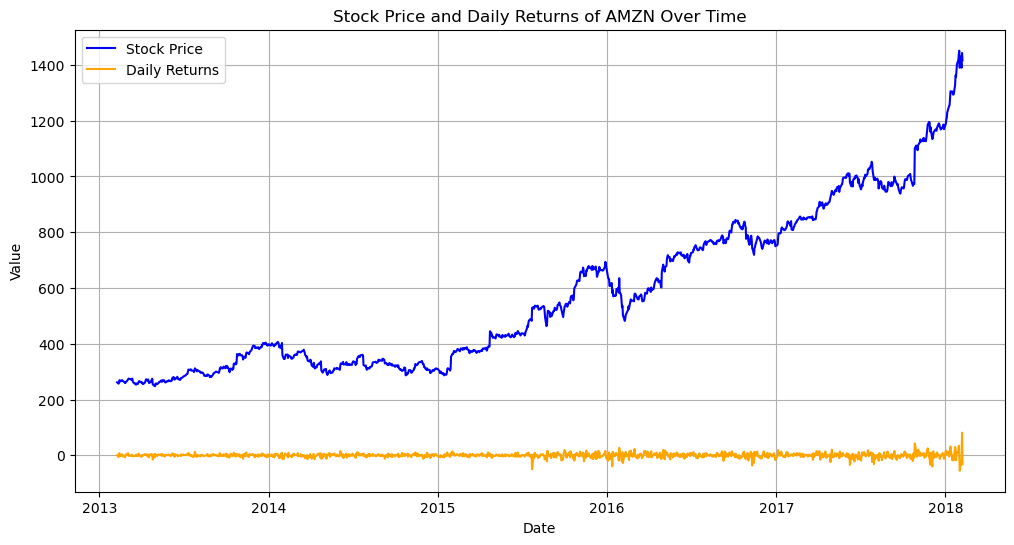

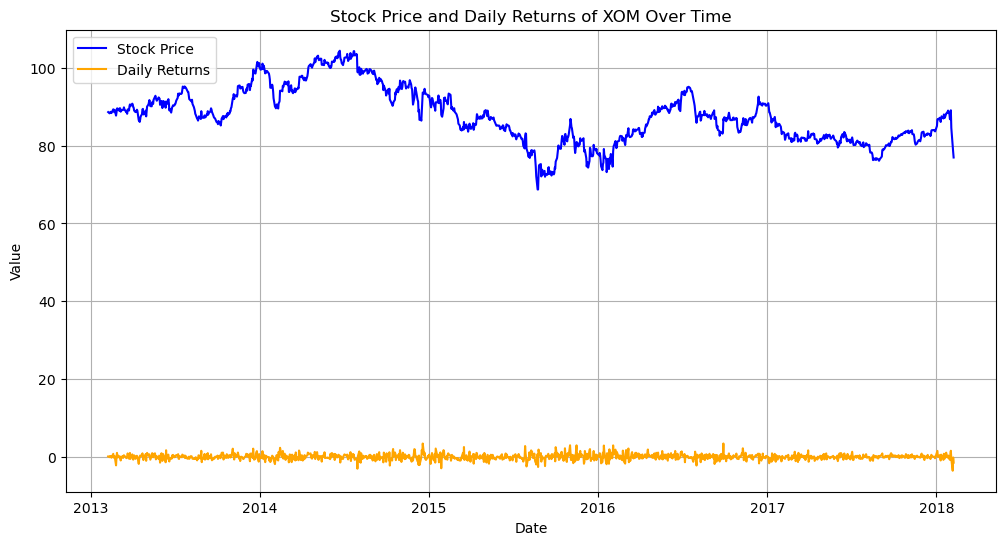

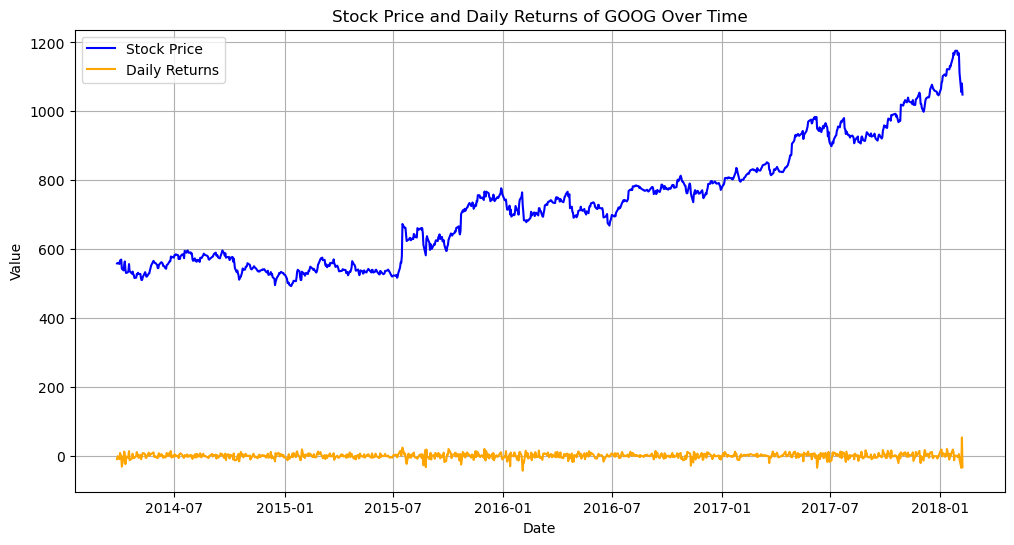

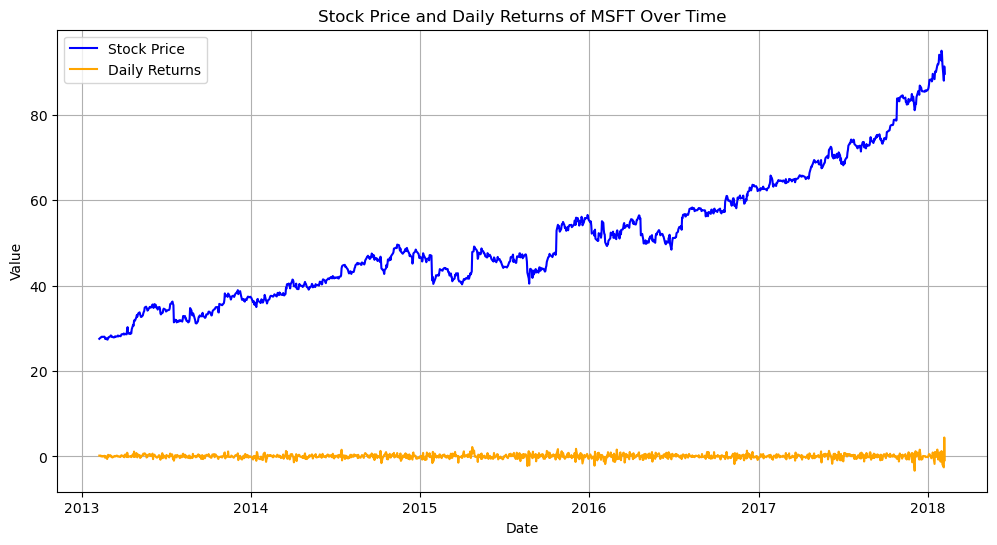

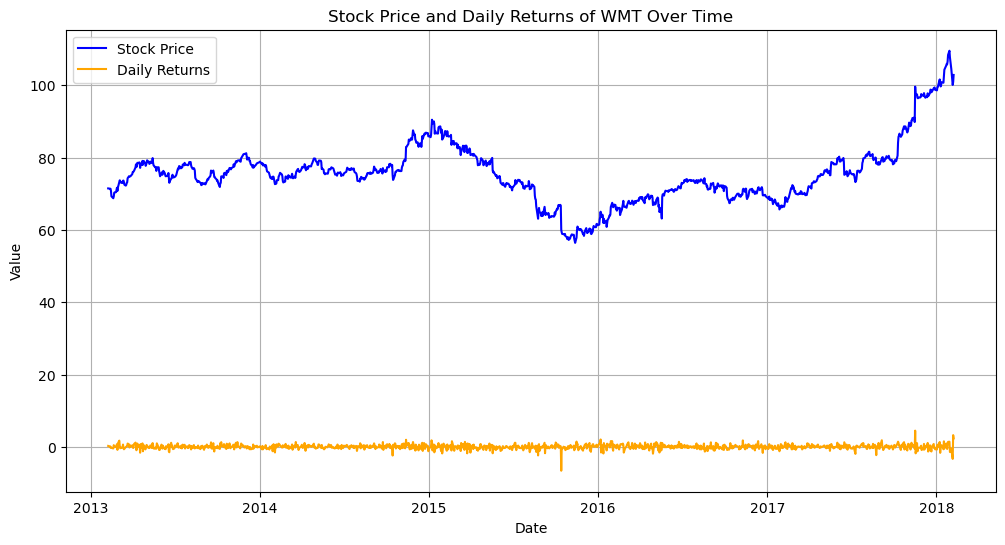

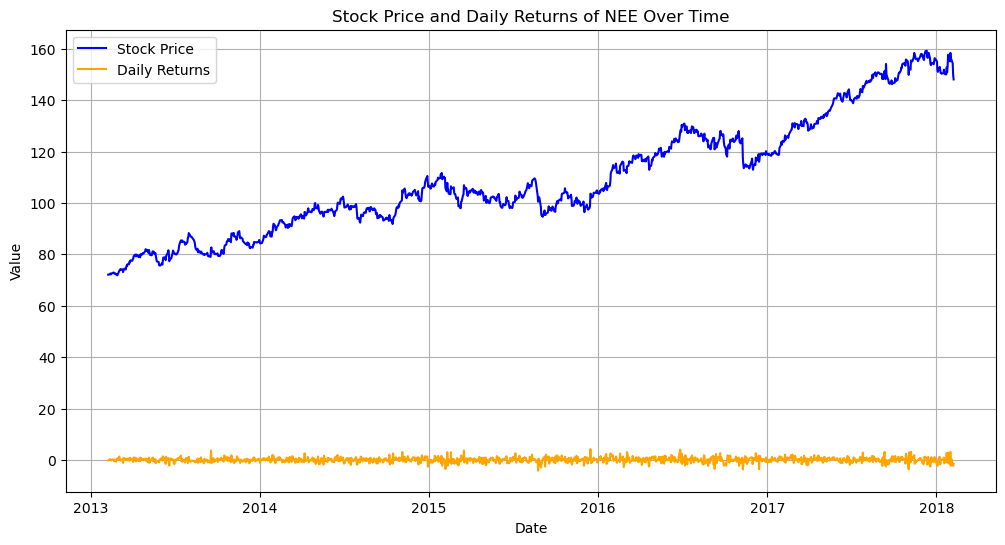

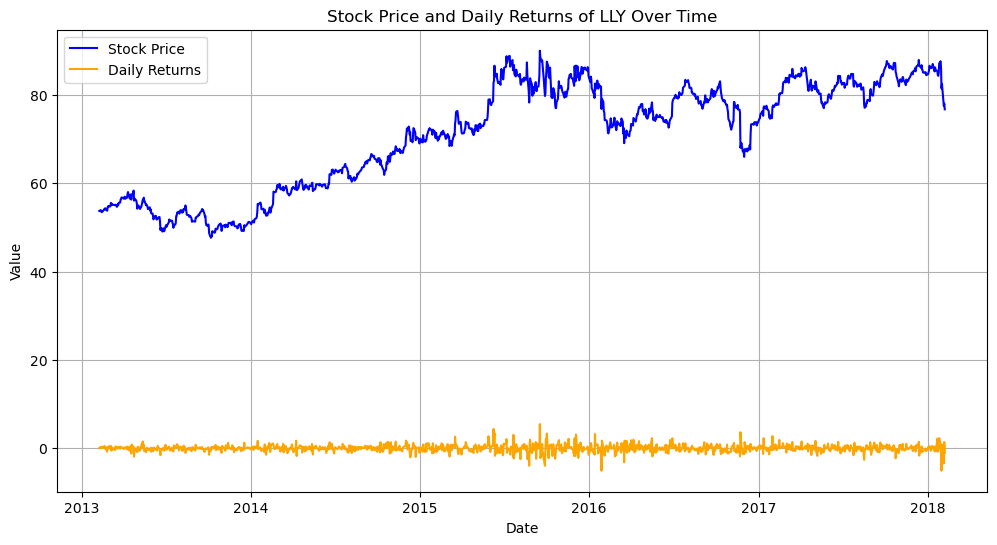

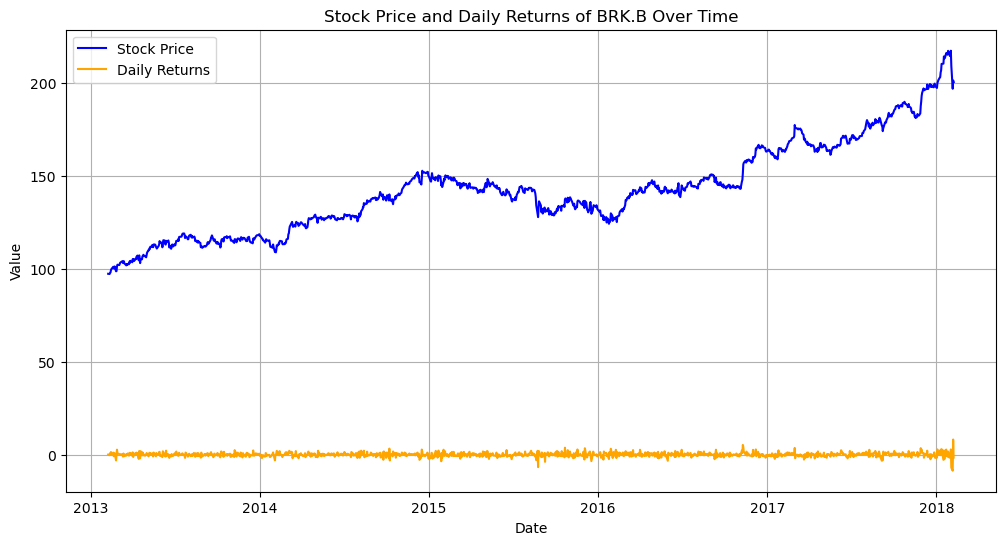

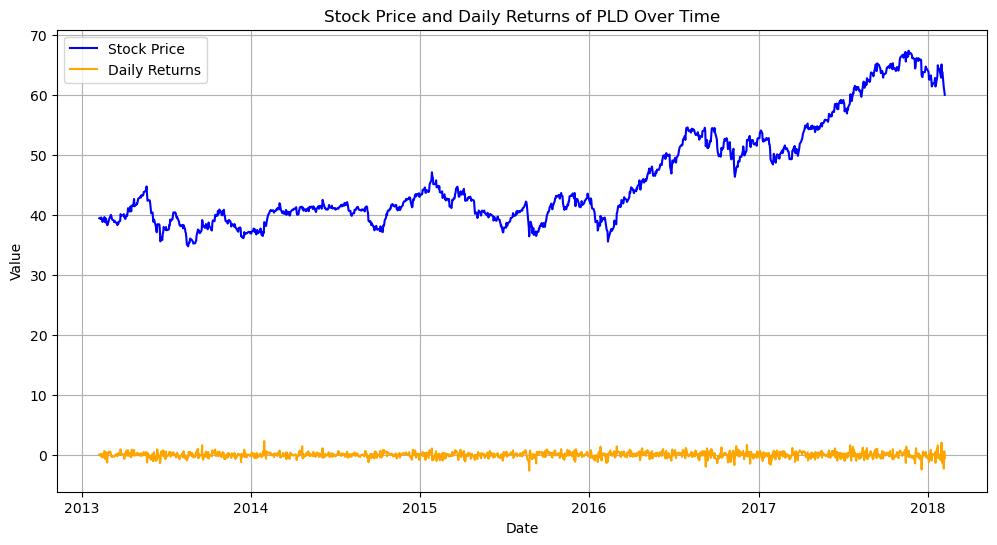

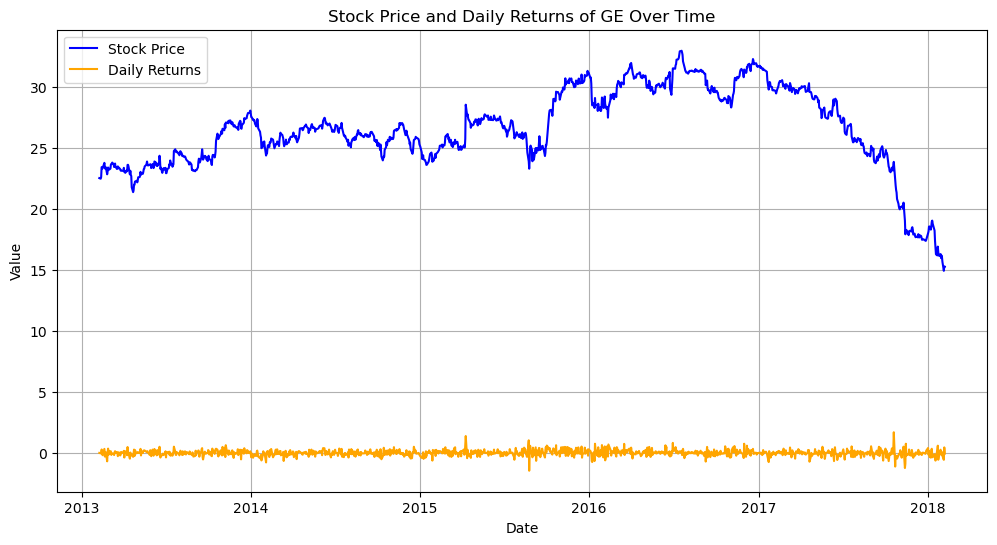

In [25]:
subset_companies = ['AMZN', 'XOM', 'GOOG', 'MSFT', 'WMT', 'NEE', 'LLY', 'BRK.B', 'PLD', 'GE']

for ticker in subset_companies:
    chart_data1 = df1[df1['Name'] == ticker]
    chart_data1.set_index('date', inplace = True)
    plt.figure(figsize=(12, 6))
    plt.plot(chart_data1.index, chart_data1['close'], label='Stock Price', color='blue')
    plt.plot(chart_data1.index, chart_data1['returns'], label='Daily Returns', color='orange')
    plt.title('Stock Price and Daily Returns of '+ticker+' Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    plt.grid(True)



#### Univariate Analysis

In [26]:
df1['volatility'] = df1['returns'].rolling(window=30).std()
# df1 = df1.fillna(0)
df1.head()

,date,open,high,low,close,volume,Name,Day,Month,Year,Day_of_week,Week_of_year,returns,daily_ret,Market_Index,volatility
0,2013-02-08,15.0700,15.1200,14.6300,14.7500,8407500,AAL,8,2,2013,4,6,-0.32,NaN,NaN,NaN
1,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,8,2,2013,4,6,0.14,NaN,NaN,NaN
2,2013-02-08,78.3400,79.7200,78.0100,78.9000,1298137,AAP,8,2,2013,4,6,0.56,NaN,NaN,NaN
3,2013-02-08,36.3700,36.4200,35.8250,36.2500,13858795,ABBV,8,2,2013,4,6,-0.12,NaN,NaN,NaN
4,2013-02-08,46.5200,46.8950,46.4600,46.8900,1232802,ABC,8,2,2013,4,6,0.37,NaN,NaN,NaN


In [27]:
df1.describe()

,date,open,high,low,close,volume,Day,Month,Year,Day_of_week,Week_of_year,returns,daily_ret,Market_Index,volatility
count,619029,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05,619029.000000,619029.000000,619029.000000,619029.000000,619029.0,619029.000000,618524.000000,618553.000000,619000.000000
mean,2015-08-18 00:45:31.033279232,83.023334,83.778419,82.256200,83.043305,4.321892e+06,15.726885,6.556887,2015.125194,2.019241,26.71742,0.019971,0.000541,145.993345,1.179653
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02,1.000000,1.000000,2013.000000,0.000000,1.0,-100.980000,-0.626183,97.846887,0.182791
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.240800,1.070351e+06,8.000000,4.000000,2014.000000,1.000000,14.0,-0.370000,-0.006793,130.445485,0.687982
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082165e+06,16.000000,7.000000,2015.000000,2.000000,27.0,0.020000,0.000635,146.263585,0.935430
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284550e+06,23.000000,10.000000,2016.000000,3.000000,40.0,0.420000,0.008105,159.548587,1.345522
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,31.000000,12.000000,2018.000000,4.000000,53.0,81.380000,1.009513,203.801158,18.501935
std,NaN,97.378769,98.207735,96.507634,97.388913,8.693671e+06,8.745244,3.427448,1.445846,1.398754,14.962065,1.558590,0.016060,23.041449,0.886690


In [28]:
df1.dropna(inplace = True) # First 30 rows for volatility will be null, so dropping those

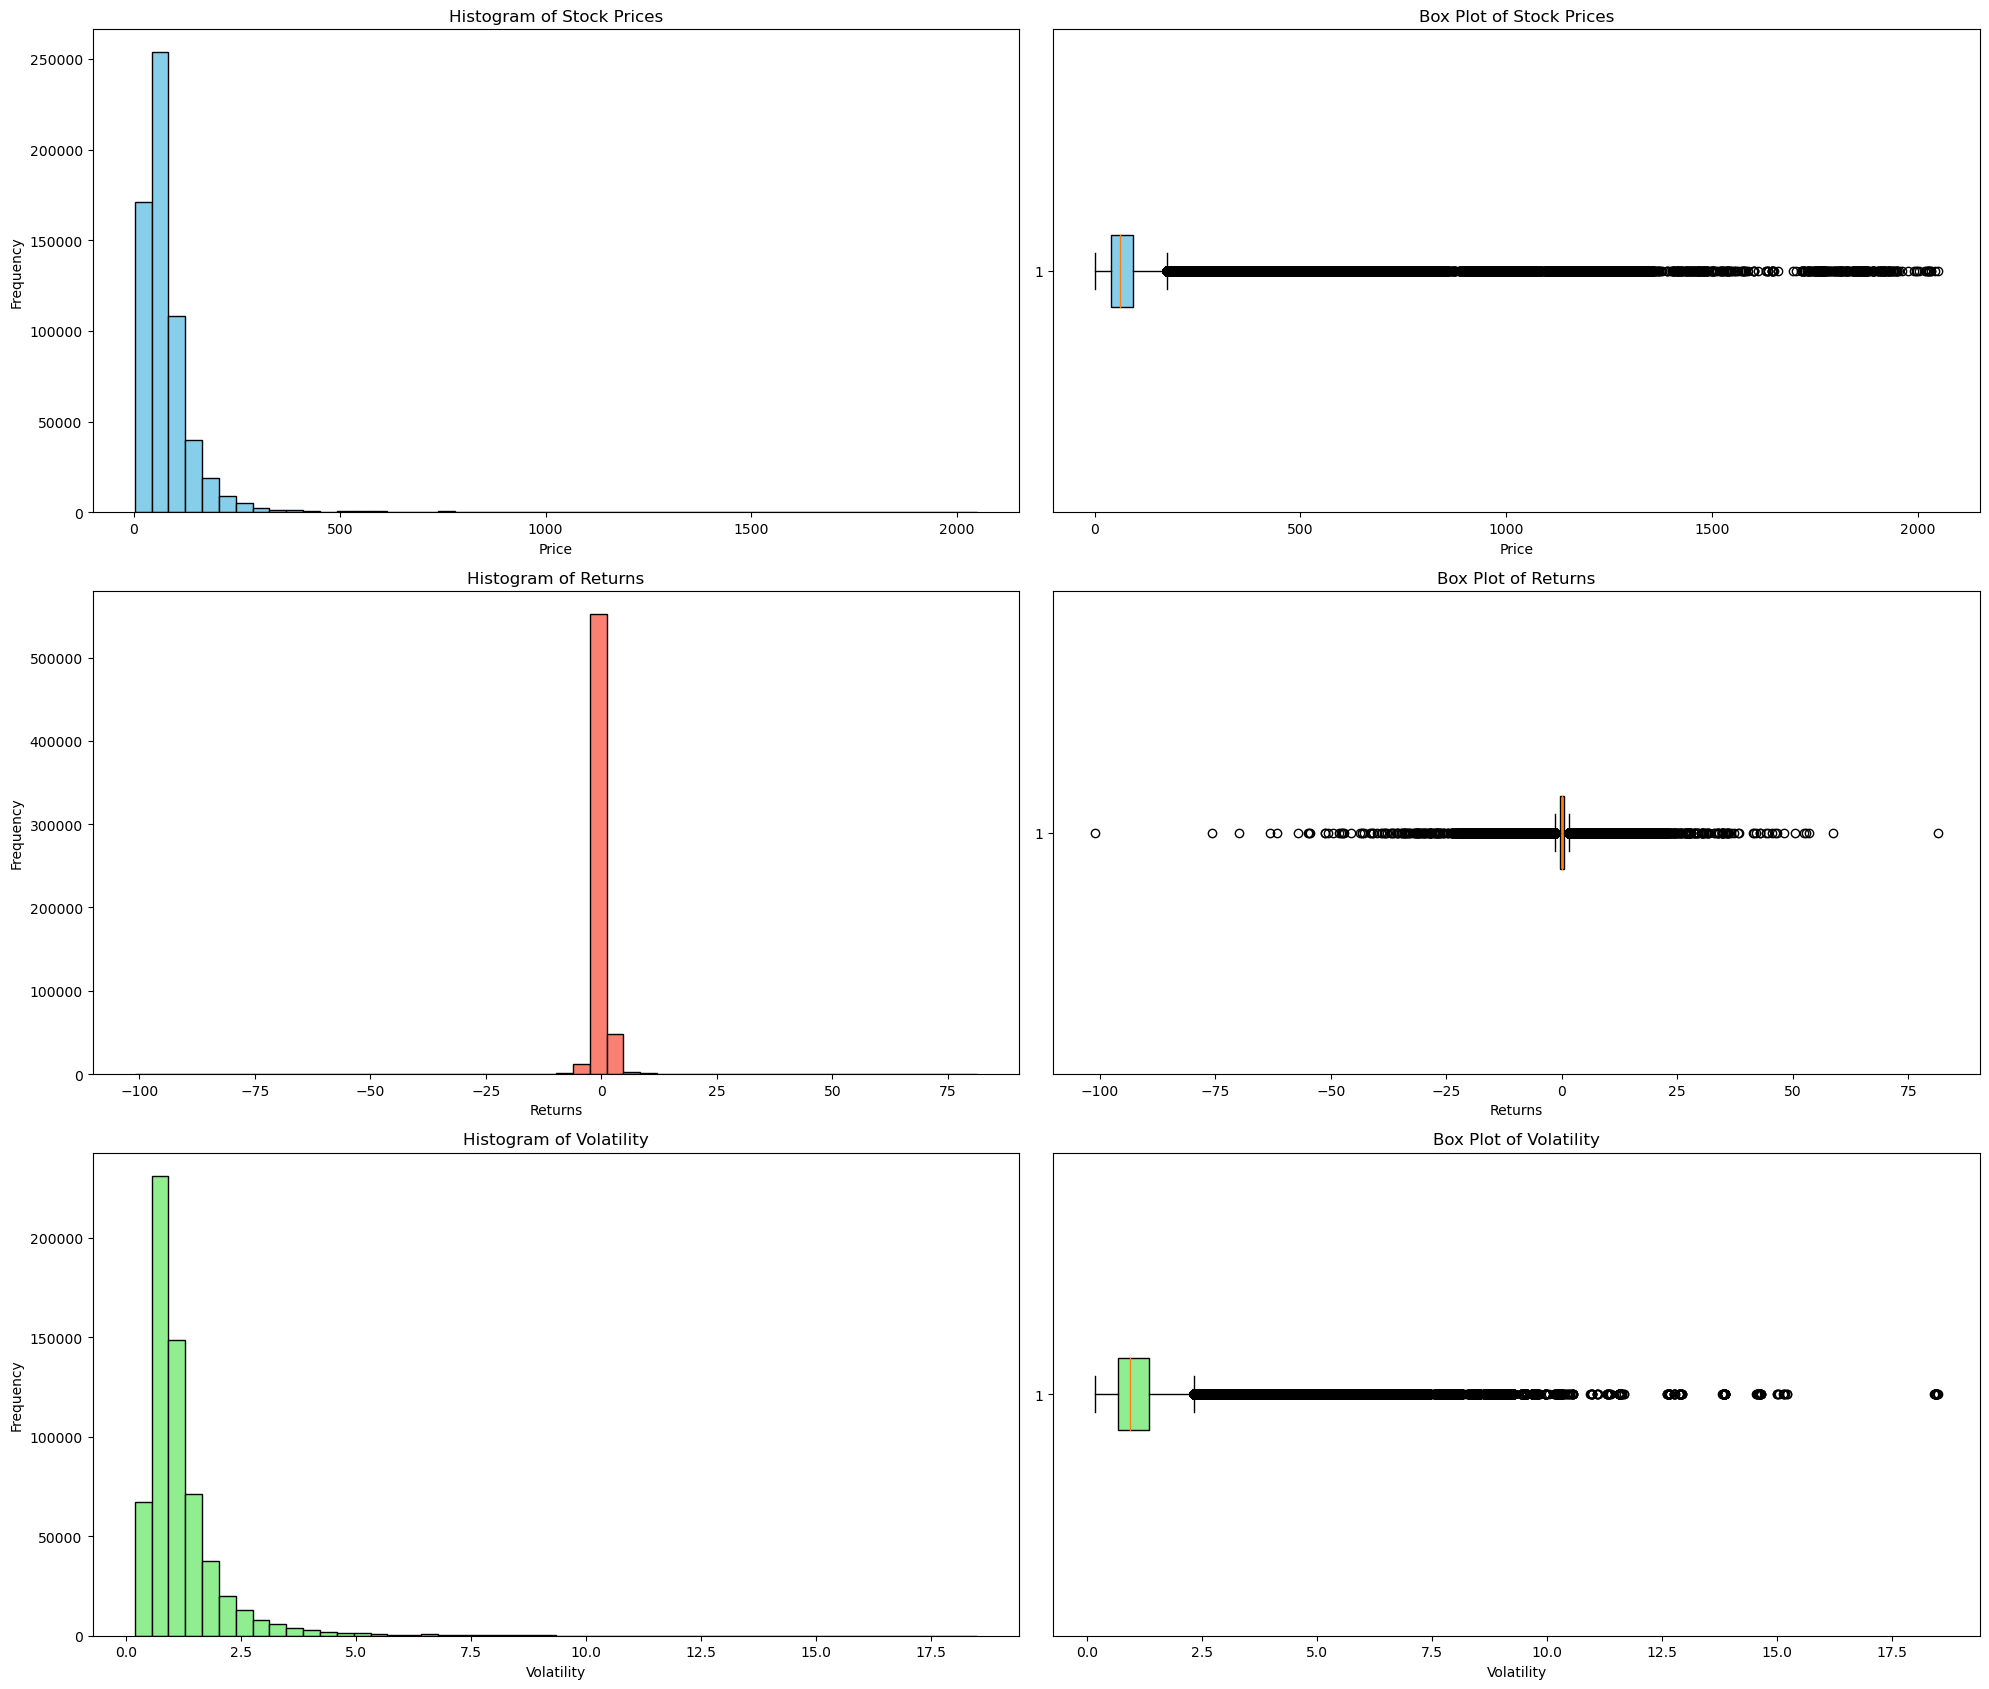

In [29]:
fig, axs = plt.subplots(3, 2, figsize=(20, 17))

axs[0, 0].hist(df1['close'], bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Stock Prices')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')

axs[1, 0].hist(df1['returns'], bins=50, color='salmon', edgecolor='black')
axs[1, 0].set_title('Histogram of Returns')
axs[1, 0].set_xlabel('Returns')
axs[1, 0].set_ylabel('Frequency')

axs[2, 0].hist(df1['volatility'], bins=50, color='lightgreen', edgecolor='black')
axs[2, 0].set_title('Histogram of Volatility')
axs[2, 0].set_xlabel('Volatility')
axs[2, 0].set_ylabel('Frequency')

axs[0, 1].boxplot(df1['close'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
axs[0, 1].set_title('Box Plot of Stock Prices')
axs[0, 1].set_xlabel('Price')

axs[1, 1].boxplot(df1['returns'], vert=False, patch_artist=True, boxprops=dict(facecolor='salmon'))
axs[1, 1].set_title('Box Plot of Returns')
axs[1, 1].set_xlabel('Returns')

axs[2, 1].boxplot(df1['volatility'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axs[2, 1].set_title('Box Plot of Volatility')
axs[2, 1].set_xlabel('Volatility')

plt.tight_layout()
plt.show()

#### Bi-Variate Analysis

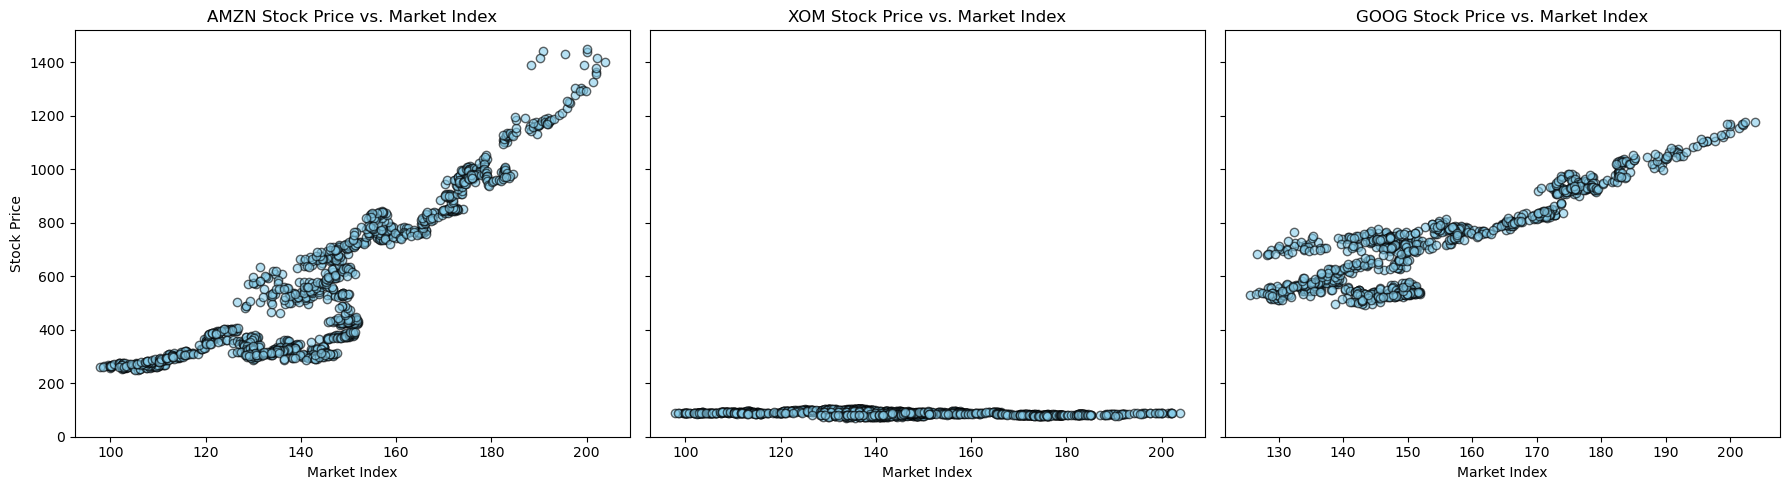

In [30]:
# Plot the relationship between stock prices and market indices through scatter plots and correlation matrices.

import seaborn as sns


fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, company in enumerate(subset_companies[:3]):
    company_data = df1[df1['Name'] == company]
    axs[i].scatter(company_data['Market_Index'], company_data['close'], alpha=0.6, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{company} Stock Price vs. Market Index')
    axs[i].set_xlabel('Market Index')
    axs[i].set_ylabel('Stock Price' if i == 0 else '')

plt.tight_layout()
plt.show()

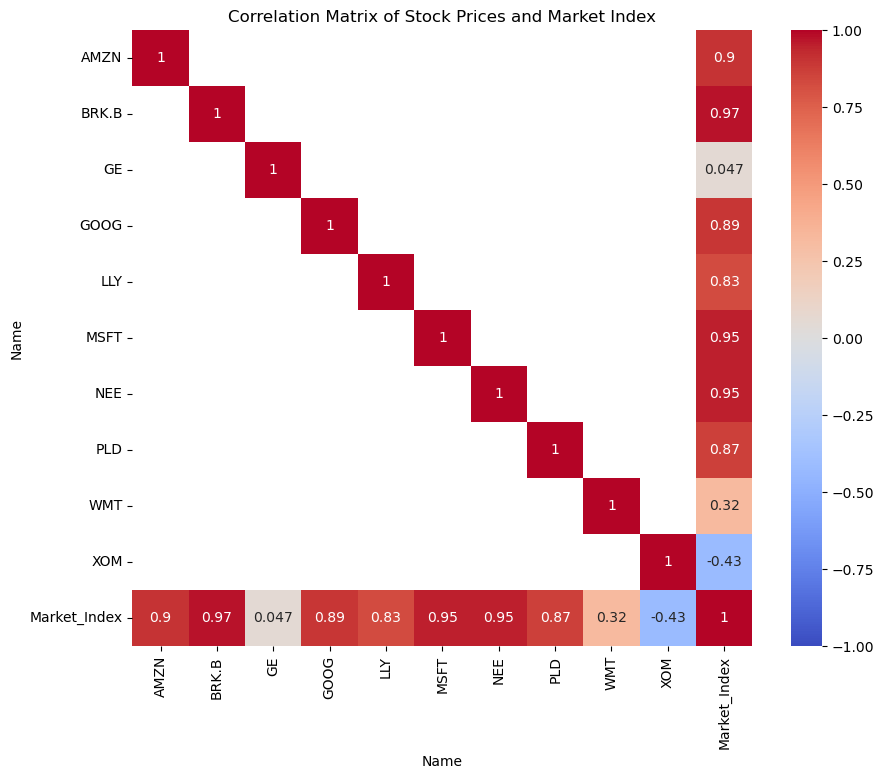

In [31]:
# Correlation Matrices between stock returns and Market Index.

corr_dataset = df1[df1['Name'].isin(subset_companies)]
pivot_df = corr_dataset.pivot(columns='Name', values='close')
pivot_df['Market_Index'] = corr_dataset['Market_Index']

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Prices and Market Index')
plt.show()

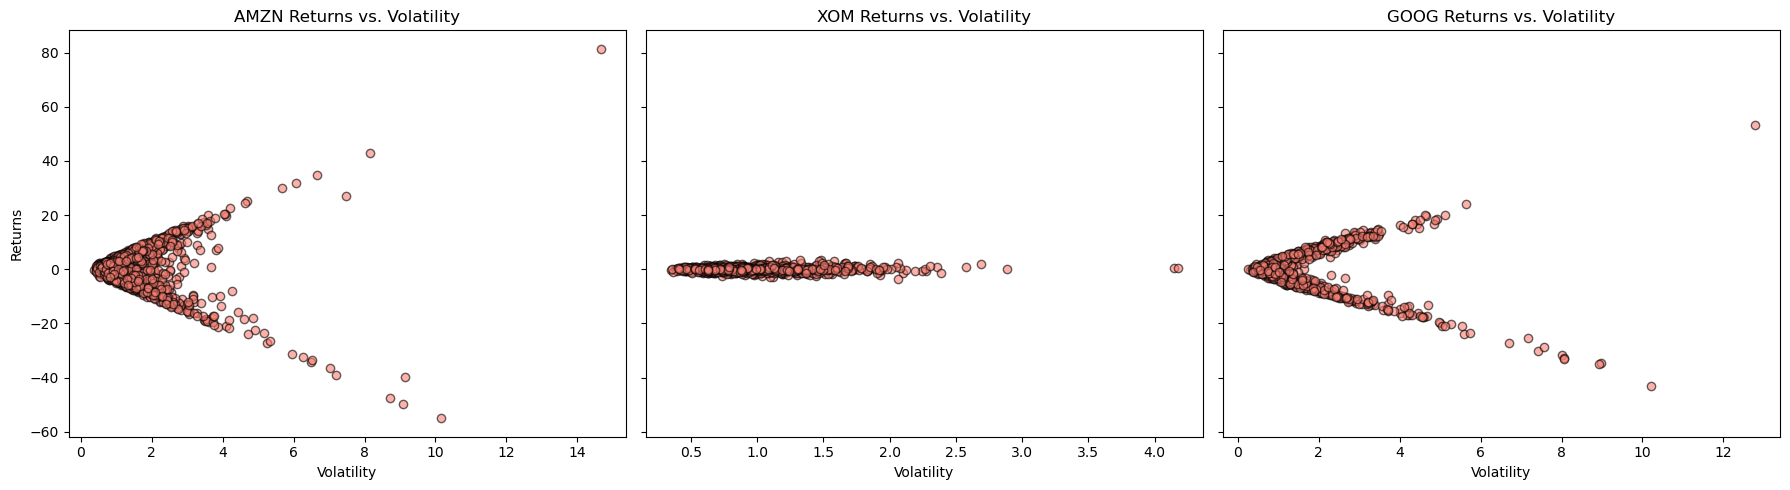

In [32]:
# Plot the relationship between stock returns and volatility through scatter plots and correlation matrices.

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, company in enumerate(subset_companies[:3]):
    company_data = df1[df1['Name'] == company]
    axs[i].scatter(company_data['volatility'], company_data['returns'], alpha=0.6, color='salmon', edgecolor='black')
    axs[i].set_title(f'{company} Returns vs. Volatility')
    axs[i].set_xlabel('Volatility')
    axs[i].set_ylabel('Returns' if i == 0 else '')

plt.tight_layout()
plt.show()

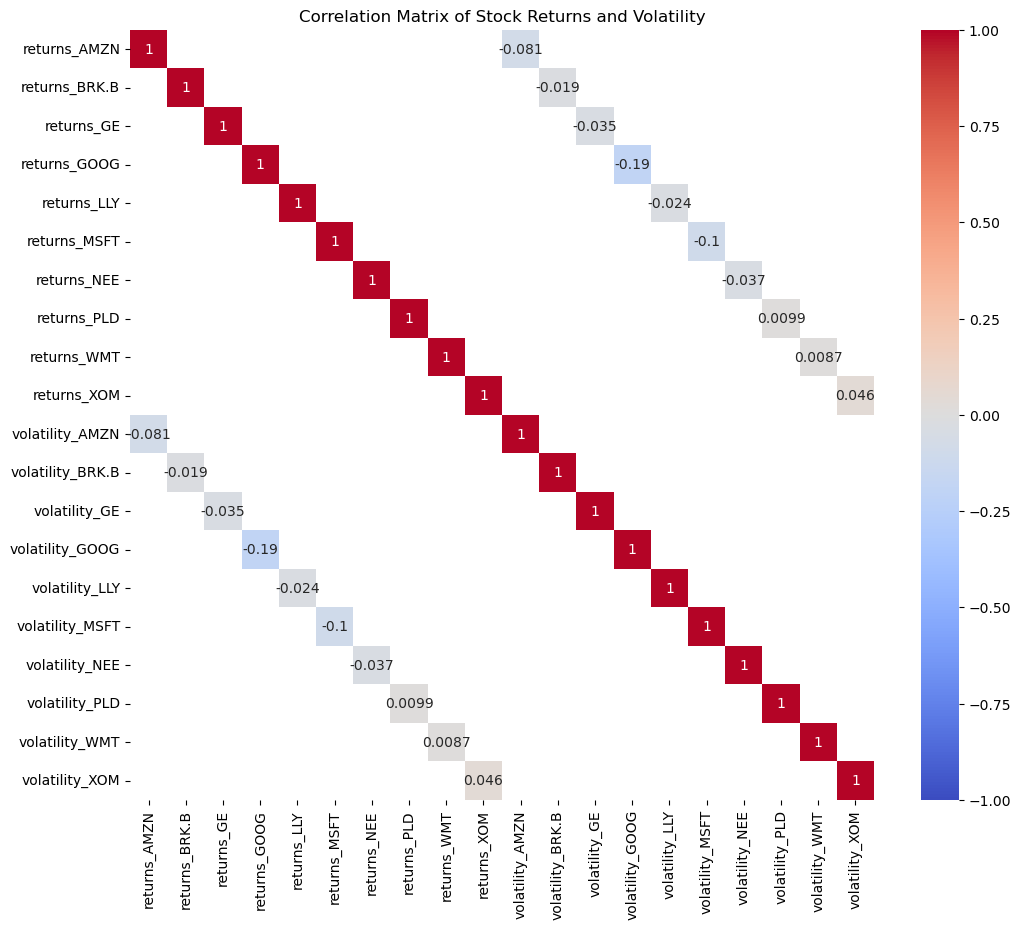

In [33]:
# Correlation Matrices between stock returns and volatility.


returns_pivot = corr_dataset.pivot(columns='Name', values='returns')
volatility_pivot = corr_dataset.pivot(columns='Name', values='volatility')

# Concatenate Returns and Volatility side-by-side for correlation calculation
combined_df = pd.concat([returns_pivot, volatility_pivot], axis=1, keys=['returns', 'volatility'])
combined_df.columns = [f'{stat}_{ticker}' for stat, ticker in combined_df.columns]

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Returns and Volatility')
plt.show()

### Time Series Analysis

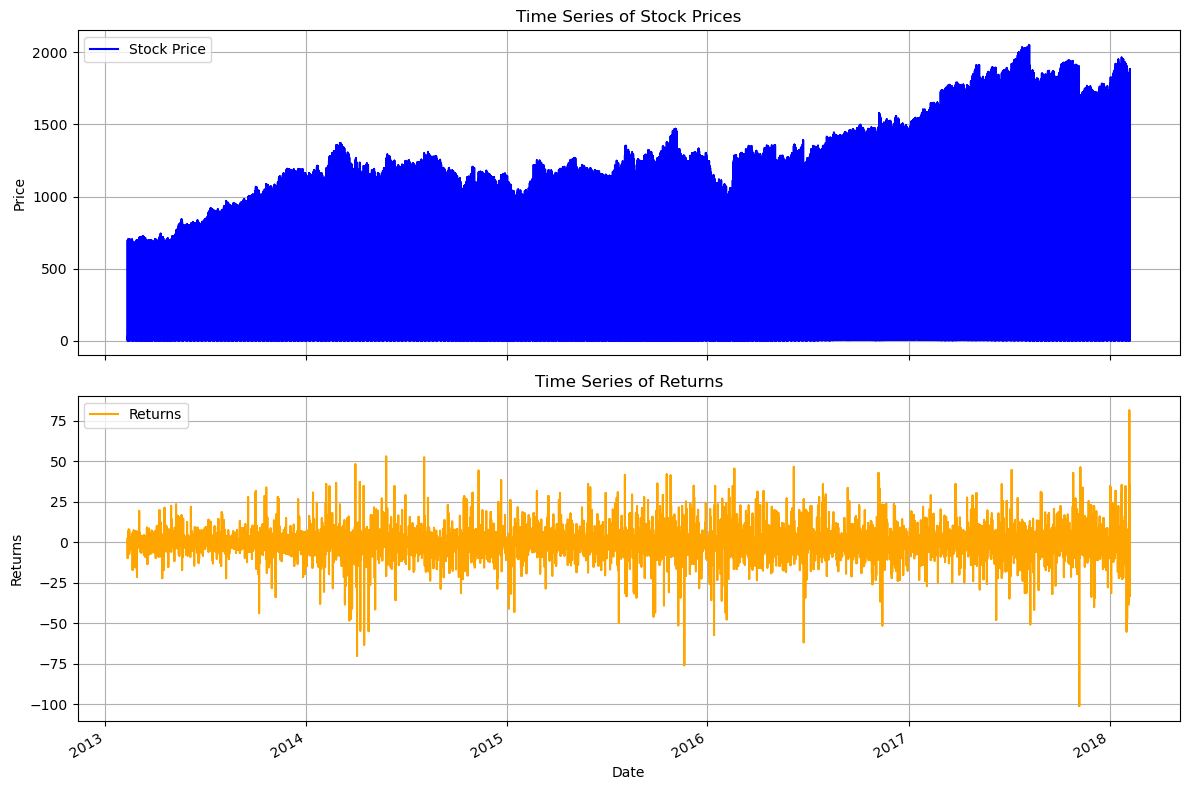

In [37]:
# Plot the time series of stock prices and returns on line charts.

df1.set_index('date', inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Line chart for Stock Prices
axs[0].plot(df1.index, df1['close'], color='blue', label='Stock Price')
axs[0].set_title('Time Series of Stock Prices')
axs[0].set_ylabel('Price')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# Line chart for Returns
axs[1].plot(df1.index, df1['returns'], color='orange', label='Returns')
axs[1].set_title('Time Series of Returns')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Returns')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Auto-format the x-axis dates for better readability
plt.gcf().autofmt_xdate()

# Show the plots
plt.tight_layout()
plt.show()

Stock prices and returns on line charts for any specific ticker name:

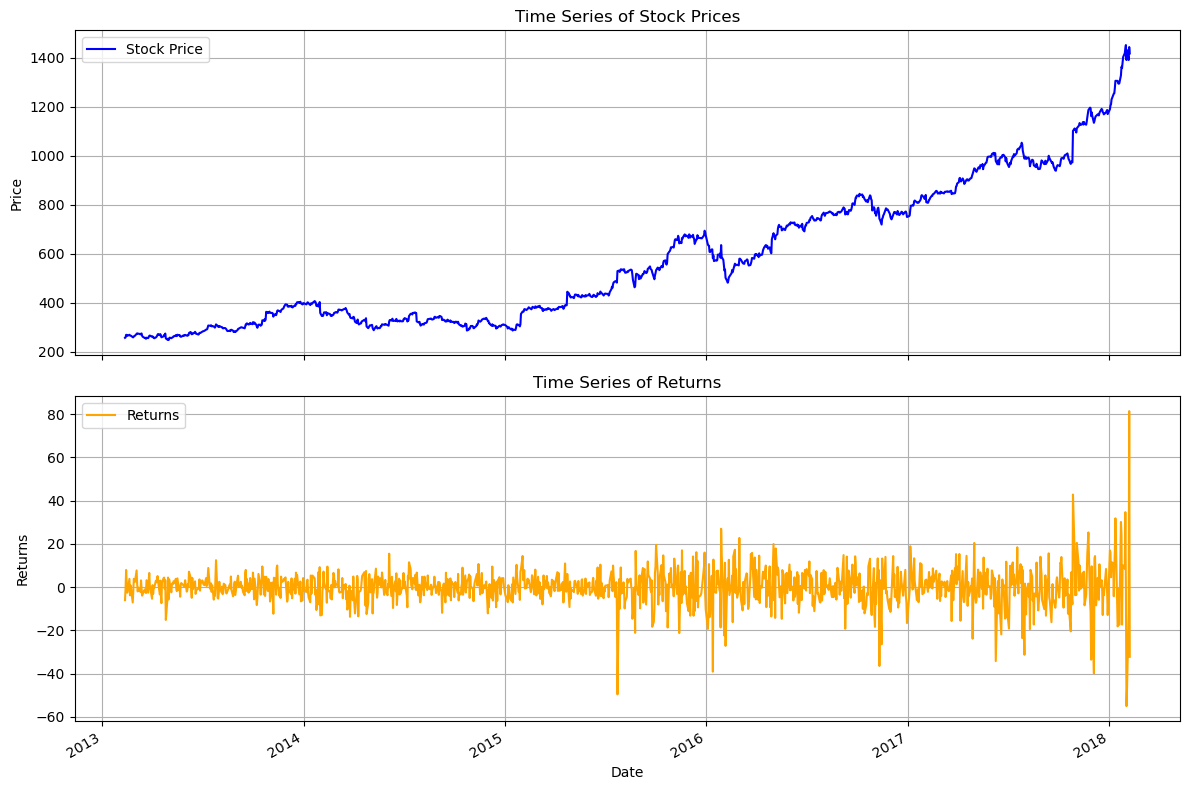

In [39]:
amzn = df1[df1['Name']=='AMZN']

# amzn.set_index('date', inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Line chart for Stock Prices
axs[0].plot(amzn.index, amzn['close'], color='blue', label='Stock Price')
axs[0].set_title('Time Series of Stock Prices')
axs[0].set_ylabel('Price')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# Line chart for Returns
axs[1].plot(amzn.index, amzn['returns'], color='orange', label='Returns')
axs[1].set_title('Time Series of Returns')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Returns')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Auto-format the x-axis dates for better readability
plt.gcf().autofmt_xdate()

# Show the plots
plt.tight_layout()
plt.show()

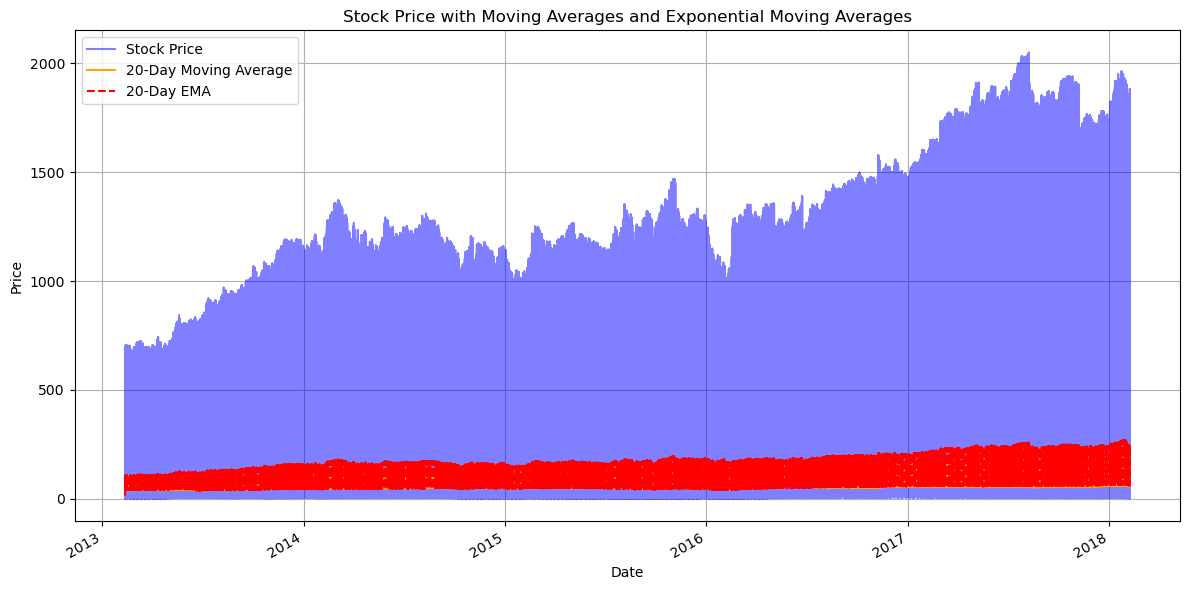

In [42]:
# Calculate and plot moving averages and exponential moving averages.

# Considering a 20 day moving average and exponential averages

df1['MA_20'] = df1['close'].rolling(window=20).mean()
df1['EMA_20'] = df1['close'].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(12, 6))

# Plot original closing price
plt.plot(df1.index, df1['close'], label='Stock Price', color='blue', alpha=0.5)

# Plot Moving Averages
plt.plot(df1.index, df1['MA_20'], label='20-Day Moving Average', color='orange')

# Plot Exponential Moving Averages
plt.plot(df1.index, df1['EMA_20'], label='20-Day EMA', color='red', linestyle='--')

# Customize plot
plt.title('Stock Price with Moving Averages and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)

# Auto-format x-axis dates
plt.gcf().autofmt_xdate()

# Show plot
plt.tight_layout()
plt.show()


C:\Users\aniru\AppData\Local\Temp\ipykernel_12608\1420957507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn['MA_20'] = amzn['close'].rolling(window=20).mean()
C:\Users\aniru\AppData\Local\Temp\ipykernel_12608\1420957507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn['EMA_20'] = amzn['close'].ewm(span=20, adjust=False).mean()


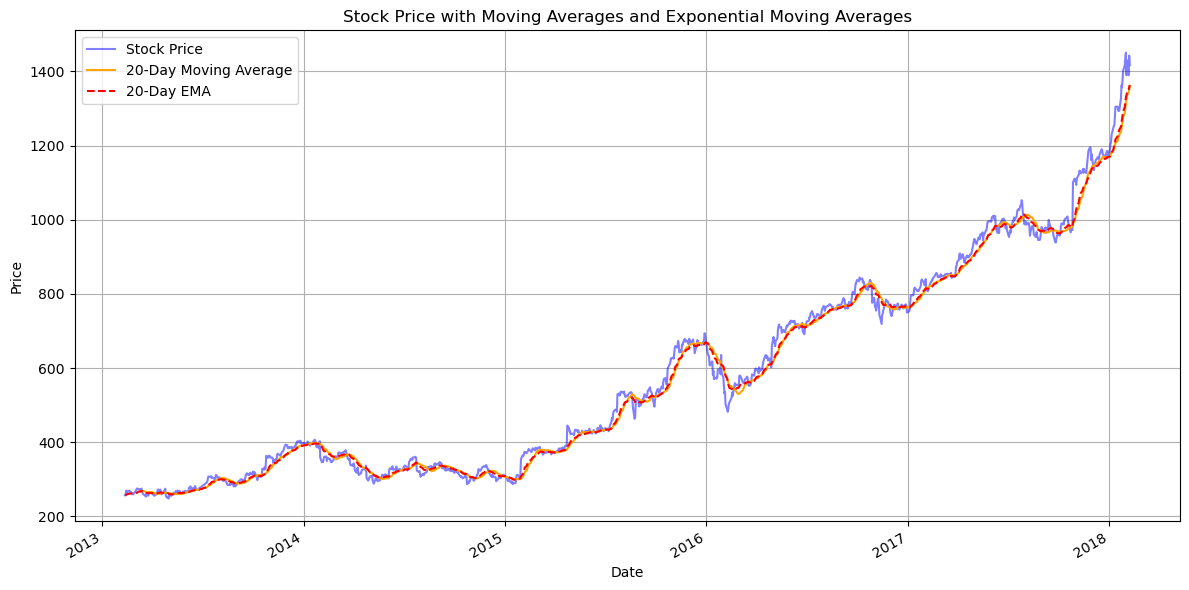

In [44]:
# Calculating and plotting moving averages and exponential moving averages of any specific company

# Considering a 20 day moving average and exponential averages

amzn['MA_20'] = amzn['close'].rolling(window=20).mean()
amzn['EMA_20'] = amzn['close'].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(12, 6))

# Plot original closing price
plt.plot(amzn.index, amzn['close'], label='Stock Price', color='blue', alpha=0.5)

# Plot Moving Averages
plt.plot(amzn.index, amzn['MA_20'], label='20-Day Moving Average', color='orange')

# Plot Exponential Moving Averages
plt.plot(amzn.index, amzn['EMA_20'], label='20-Day EMA', color='red', linestyle='--')

# Customize plot
plt.title('Stock Price with Moving Averages and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)

# Auto-format x-axis dates
plt.gcf().autofmt_xdate()

# Show plot
plt.tight_layout()
plt.show()

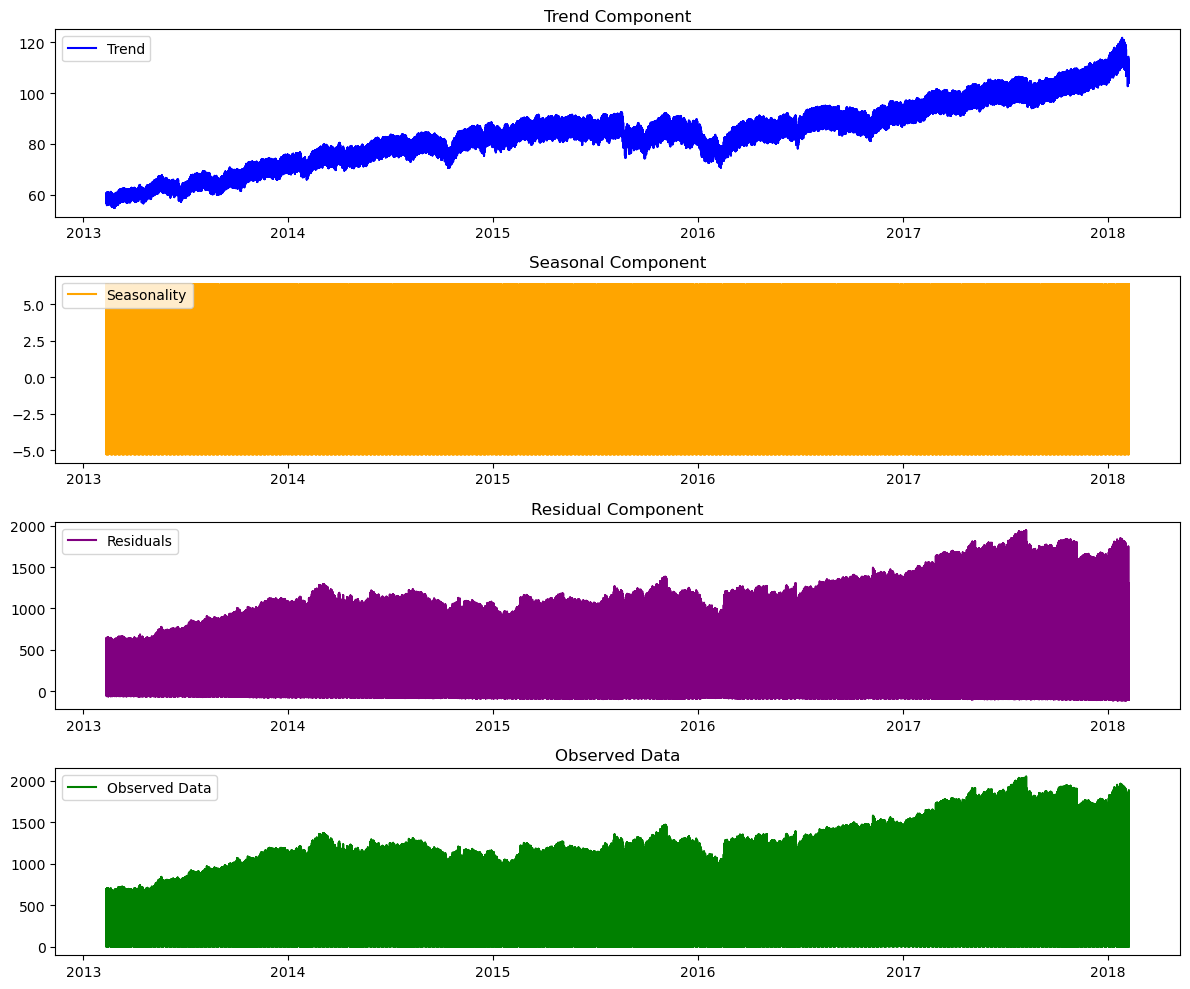

In [48]:
# Extract and discuss trends, seasonality, and cyclical effects in the data.

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1['close'], model='additive', period=365)  # Assuming yearly seasonality

plt.figure(figsize=(12, 10))

# Trend component
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Residual component (cyclical or irregular effects)
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

# Observed data
plt.subplot(4, 1, 4)
plt.plot(df1['close'], label='Observed Data', color='green')
plt.legend(loc='upper left')
plt.title('Observed Data')

plt.tight_layout()
plt.show()